In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#file = 'D:\datafile\hsif_roll_data.xlsx'

In [4]:
#df = pd.read_excel(file, index_col='Date').dropna()
import pandas_datareader.data as web
import datetime as dt

stock = '^dji'
start = '1987-01-01'
end = dt.datetime.today()

df = web.DataReader(stock,'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-12,22837.949219,21154.460938,22184.710938,21200.619141,908260000,21200.619141
2020-03-13,23189.759766,21285.369141,21973.820312,23185.619141,843080000,23185.619141
2020-03-16,21768.279297,20116.460938,20917.529297,20188.519531,770130000,20188.519531
2020-03-17,21379.349609,19882.259766,20487.050781,21237.380859,793060000,21237.380859
2020-03-18,20489.330078,18917.460938,20188.689453,19898.919922,871360000,19898.919922


In [5]:
df.drop(['Close'], axis=1, inplace=True)
df.tail()

,High,Low,Open,Volume,Adj Close
Date,,,,,
2020-03-12,22837.949219,21154.460938,22184.710938,908260000,21200.619141
2020-03-13,23189.759766,21285.369141,21973.820312,843080000,23185.619141
2020-03-16,21768.279297,20116.460938,20917.529297,770130000,20188.519531
2020-03-17,21379.349609,19882.259766,20487.050781,793060000,21237.380859
2020-03-18,20489.330078,18917.460938,20188.689453,871360000,19898.919922


In [6]:
df.rename(columns={'Adj Close':'Close'},inplace=True)
# mav_vol = df['Volume'].rolling(window=20).mean()
df.tail()

,High,Low,Open,Volume,Close
Date,,,,,
2020-03-12,22837.949219,21154.460938,22184.710938,908260000,21200.619141
2020-03-13,23189.759766,21285.369141,21973.820312,843080000,23185.619141
2020-03-16,21768.279297,20116.460938,20917.529297,770130000,20188.519531
2020-03-17,21379.349609,19882.259766,20487.050781,793060000,21237.380859
2020-03-18,20489.330078,18917.460938,20188.689453,871360000,19898.919922


In [7]:
from matplotlib import pyplot as plt 

'''testing plotting with Chinese'''
import matplotlib.font_manager as mfm

# font_path = r'c:\\Windows\fonts\kaiu.ttf'
font_path=r'c:\\WINDOWS\FONTS\DENG.TTF'
prop = mfm.FontProperties(fname=font_path)
# end

In [8]:
import datetime as dt

# period_start = pd.to_datetime(df.index[0]).strftime('%Y-%m-%d')
period_start = df.index[0]
period_end = dt.datetime.today().strftime('%Y-%m-%d')
period = (df.index>=period_start) & (df.index<=period_end)
lastday = pd.to_datetime(df.index[-2]).strftime('%Y-%m-%d')


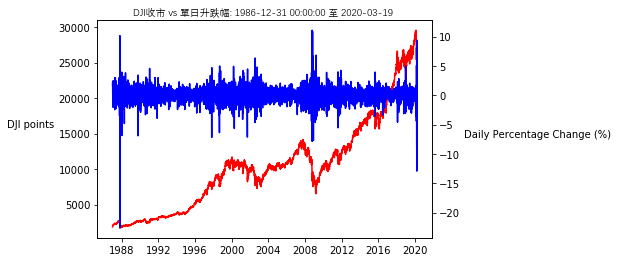

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
stock_name = stock.replace('^','').upper()

df['day_chg'] = df['Close'].pct_change()*100
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = df.index
y1 = df['Close']
y2 = df['day_chg']

curve1 = ax1.plot(x, y1, label='Close', color ='r')
curve2 = ax2.plot(x, y2, label='% change ', color ='b')

plt.title(f"{stock_name}收市 vs 單日升跌幅: {period_start} 至 {period_end} ", FontProperties=prop) 
ax1.set_ylabel(f"{stock_name} points", rotation=0, ha='right', wrap=True)
ax2.set_ylabel(f"Daily Percentage Change (%)", rotation=0, ha='left', wrap=True)

plt.plot()
plt.show()


In [10]:
df.tail()

,High,Low,Open,Volume,Close,day_chg
Date,,,,,,
2020-03-12,22837.949219,21154.460938,22184.710938,908260000,21200.619141,-9.988450
2020-03-13,23189.759766,21285.369141,21973.820312,843080000,23185.619141,9.362934
2020-03-16,21768.279297,20116.460938,20917.529297,770130000,20188.519531,-12.926546
2020-03-17,21379.349609,19882.259766,20487.050781,793060000,21237.380859,5.195336
2020-03-18,20489.330078,18917.460938,20188.689453,871360000,19898.919922,-6.302382
